In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data=pd.read_csv('Dataset/Data_of_Attack_all_data.csv')

In [3]:
all_data.describe() #summmary data from all attack data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.0,8.175500e+05,817550.000000,817550.000000,...,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,0.0,3.669500e-07,0.000003,0.002456,...,0.166868,0.161652,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,3.317906e-04,0.000805,0.041469,...,0.102058,0.111642,0.043421,0.008557,0.017459,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [4]:
### Identify any missing or incomplete data
print('Number of missing values in the all_data set:')
print(all_data.isnull().sum())


Number of missing values in the all_data set:
duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 s

In [9]:
print(all_data.columns)


Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')


In [14]:
print(all_data[' protocol_type'].dtype)

float64


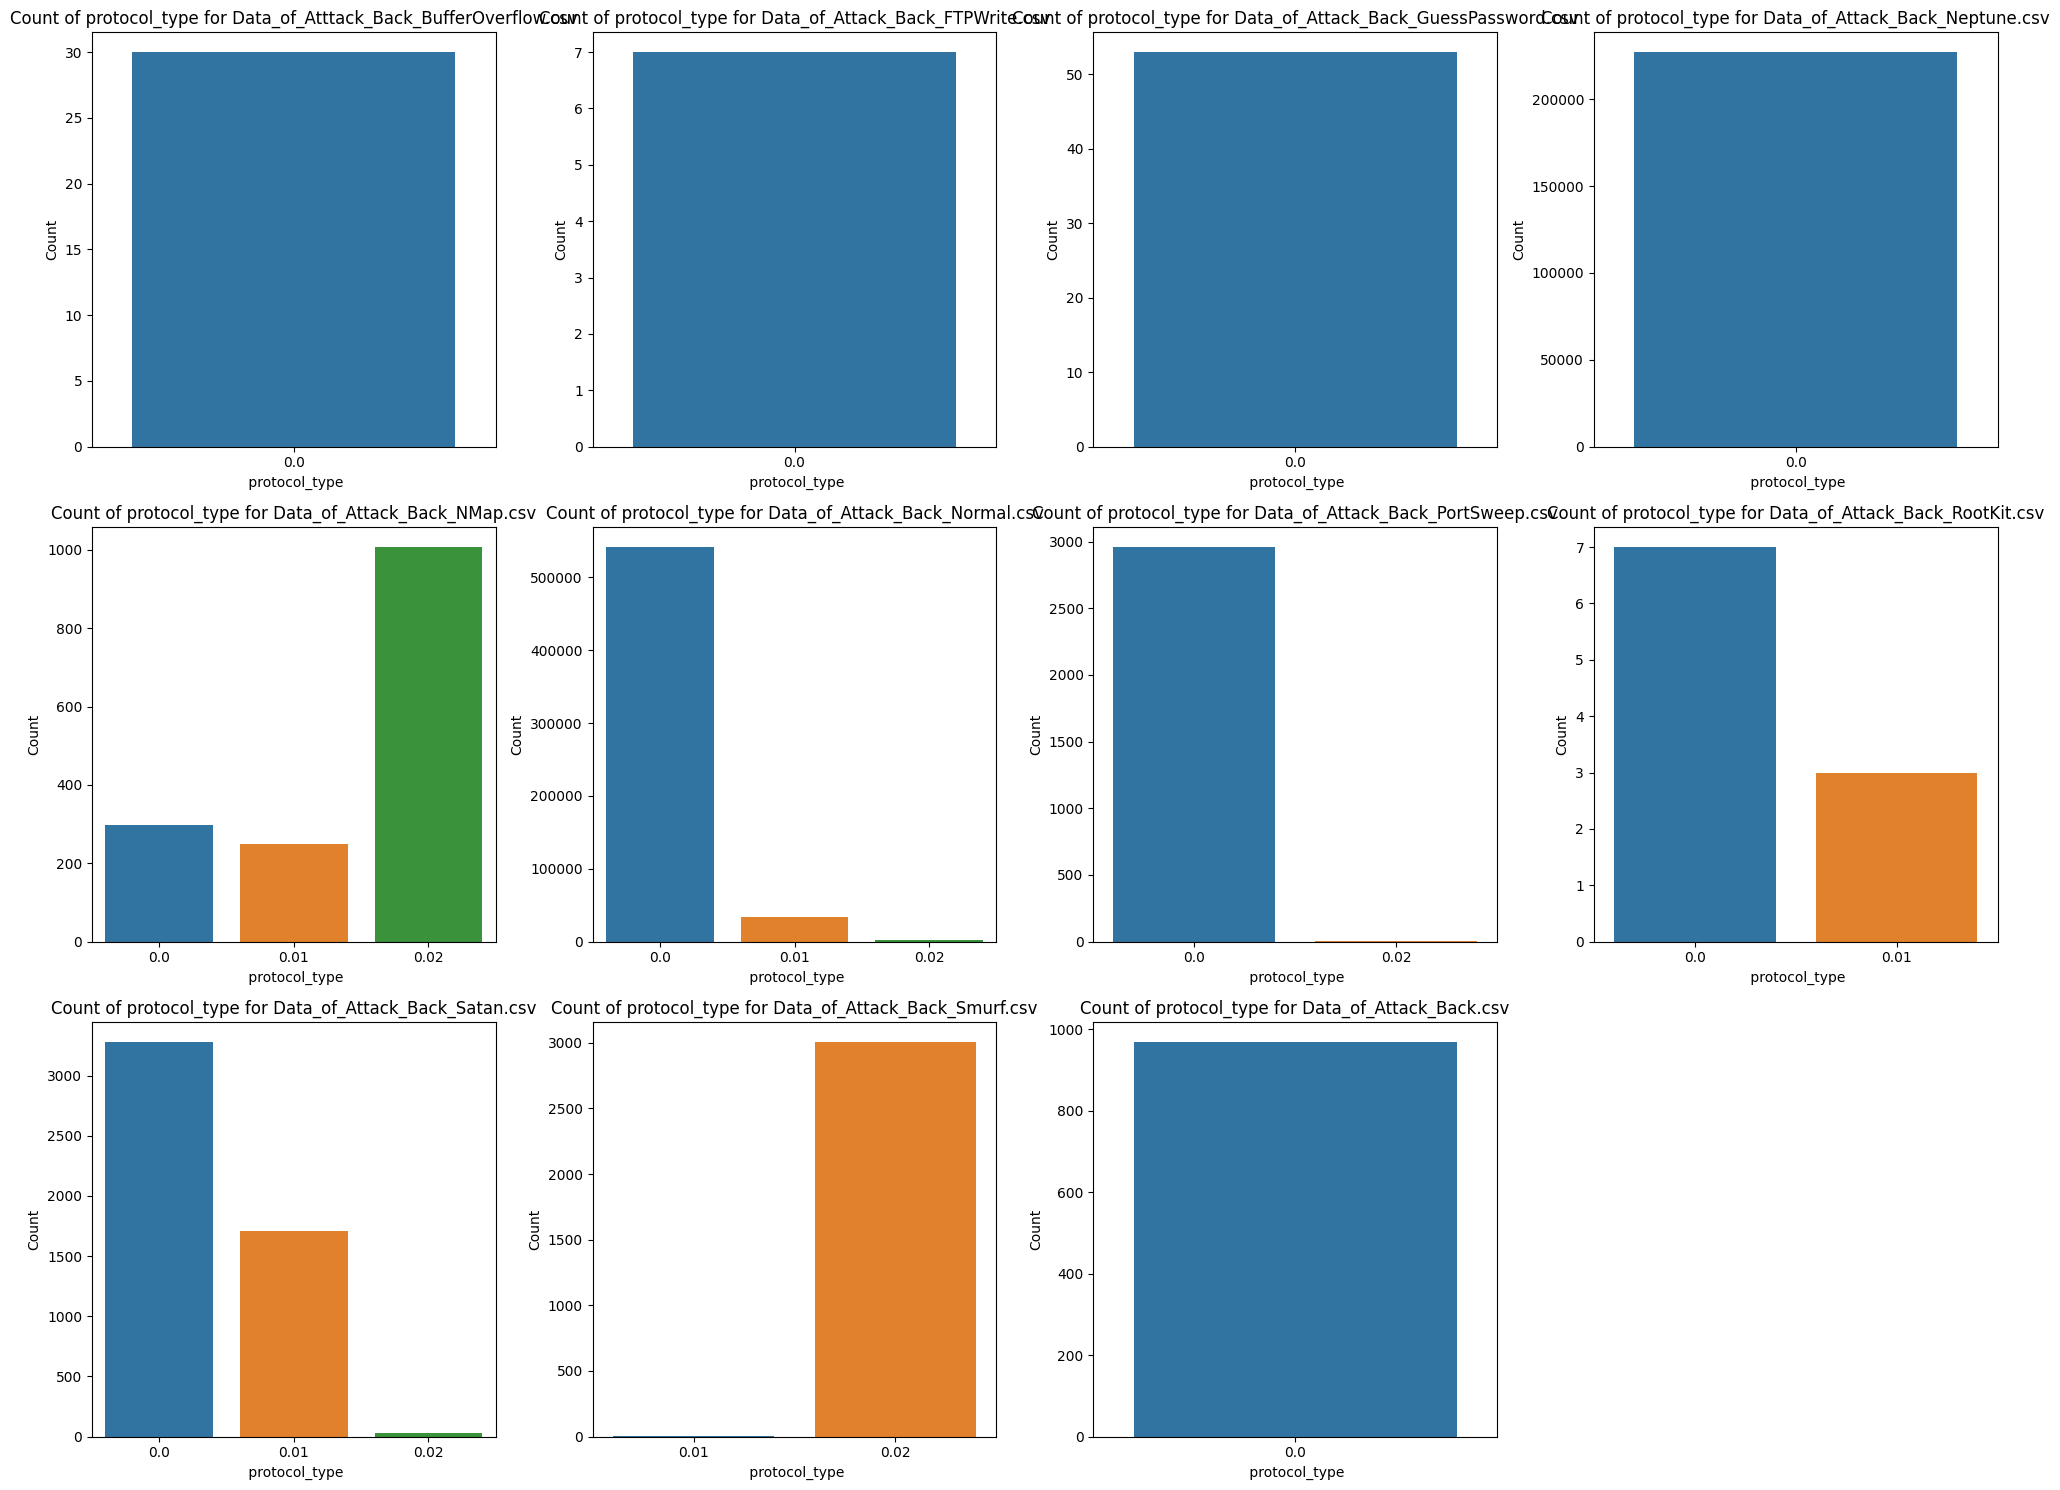

In [17]:
attack_types = all_data['attack'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(attack_types) - 1) // 4 + 1
num_cols = min(len(attack_types), 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each attack type and plot the count of protocol_type
for i, attack_type in enumerate(attack_types):
    sns.countplot(x=' protocol_type', data=all_data[all_data['attack'] == attack_type], ax=axs[i])
    axs[i].set_title(f'Count of protocol_type for {attack_type}')
    axs[i].set_xlabel(' protocol_type')
    axs[i].set_ylabel('Count')
    plt.xticks(rotation= 45)
# If there are any unused subplots, hide them
for i in range(len(attack_types), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
numerical_columns = ['serror_rate', 'srv_error_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 
                     'dst_host_serror_rate', 'dst_host_srv_serror_rate']
#take the interrest column

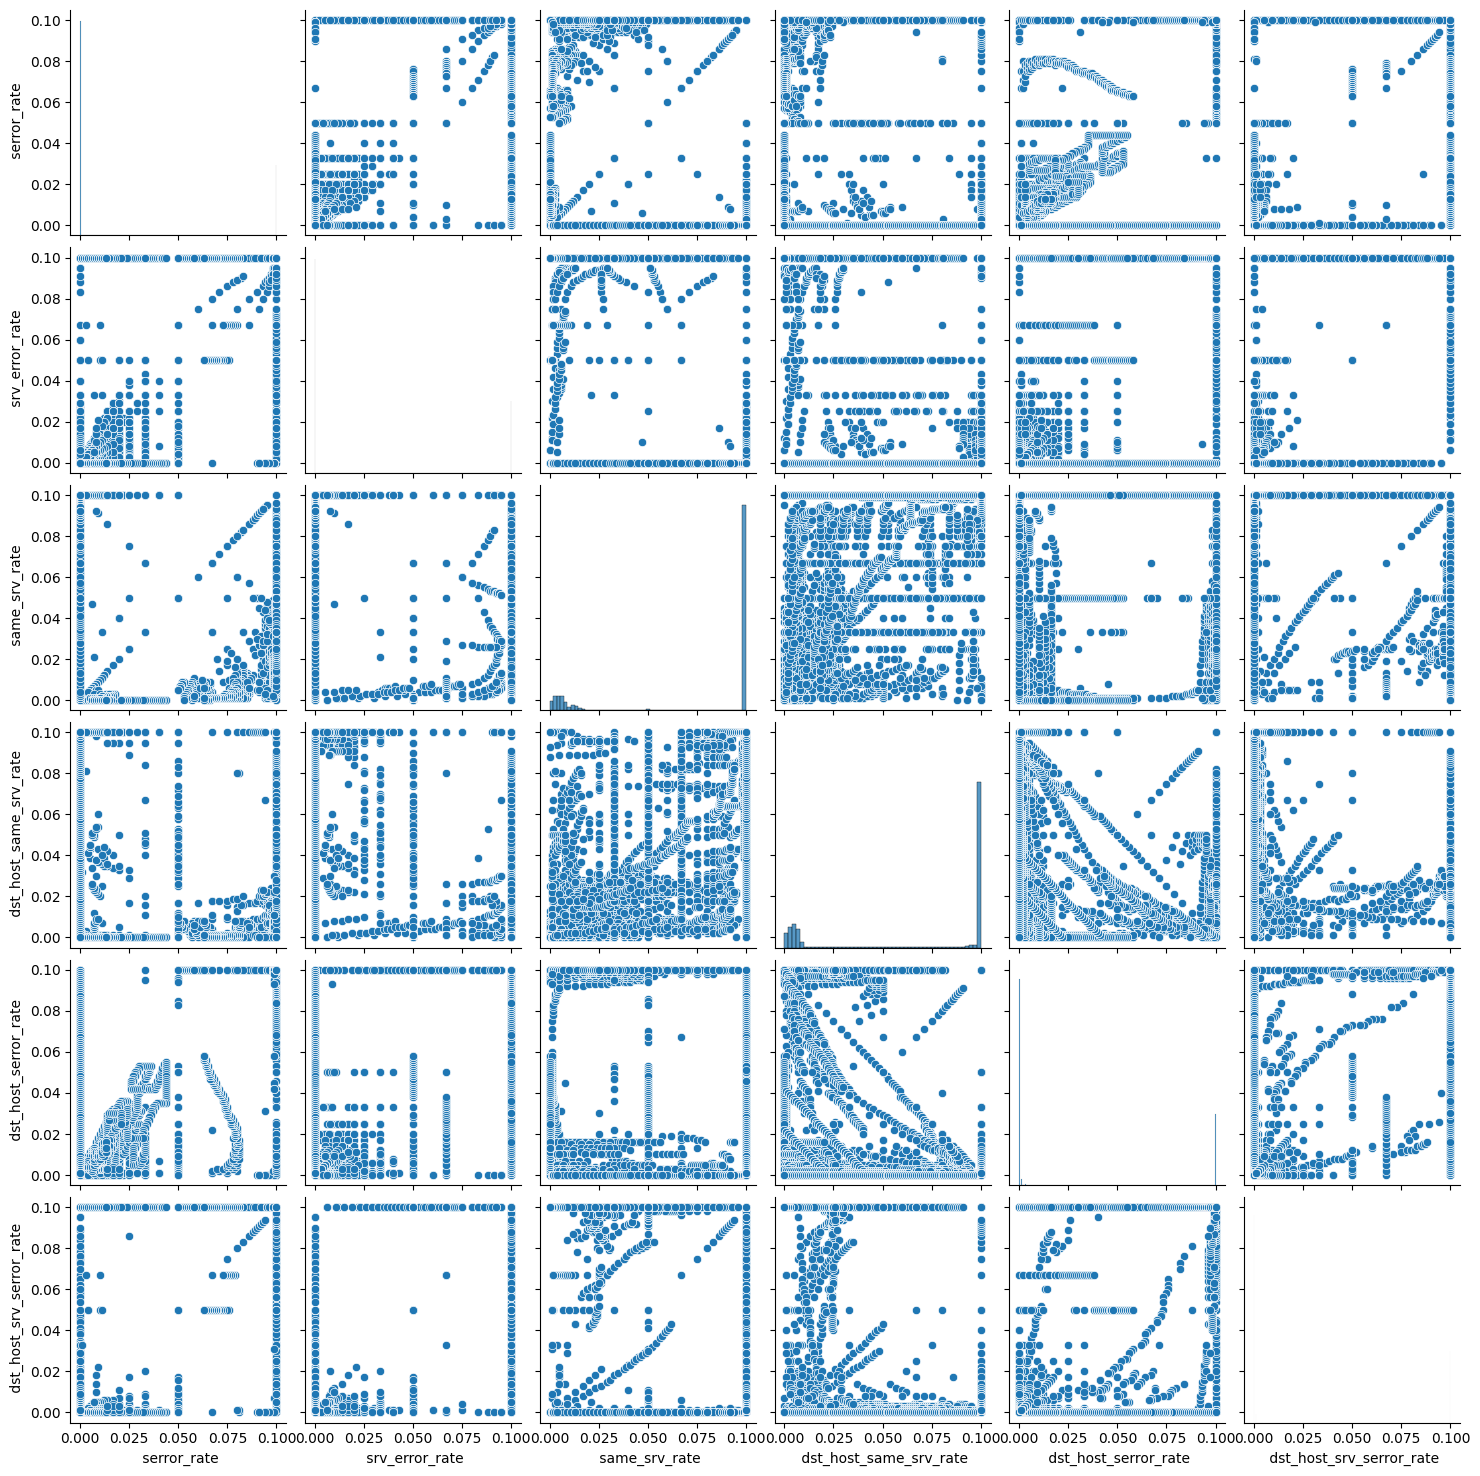

In [19]:
# Select the columns of interest
numerical_columns = [' serror_rate', ' srv_error_rate', ' same_srv_rate', ' dst_host_same_srv_rate', 
                     ' dst_host_serror_rate', ' dst_host_srv_serror_rate']

# Create a pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(all_data[numerical_columns])
plt.show()

Heat Map


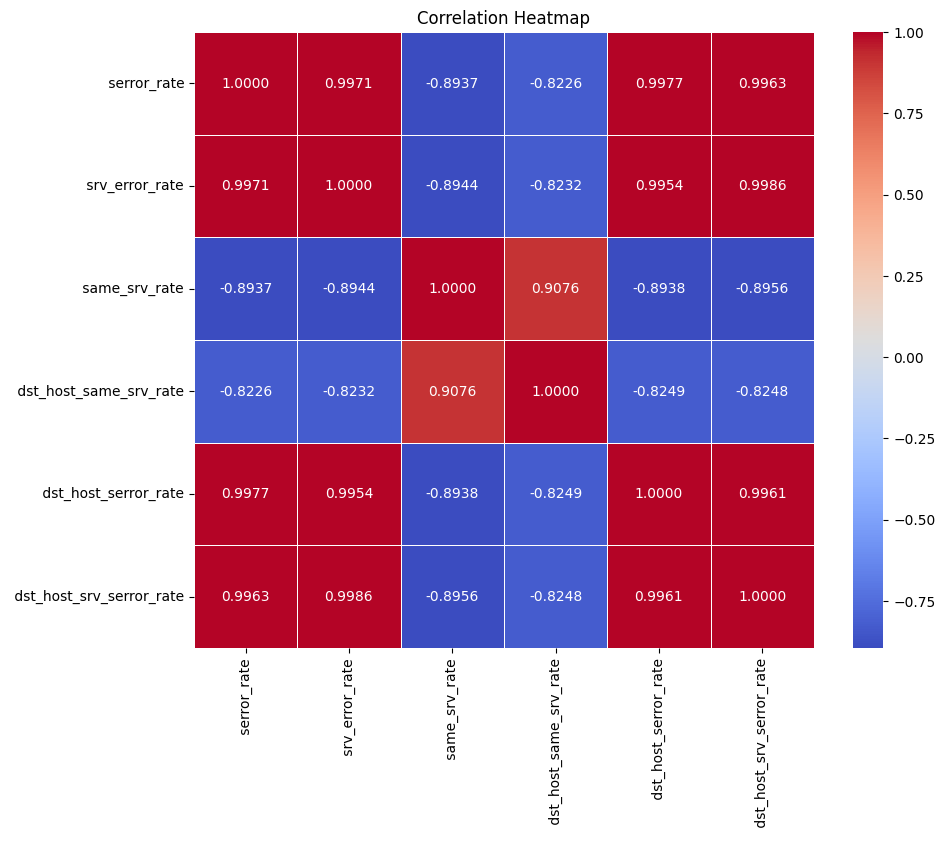

In [21]:
# Create a correlation matrix
correlation_matrix = all_data[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
all_data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [26]:
all_colums_data=[' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate',],

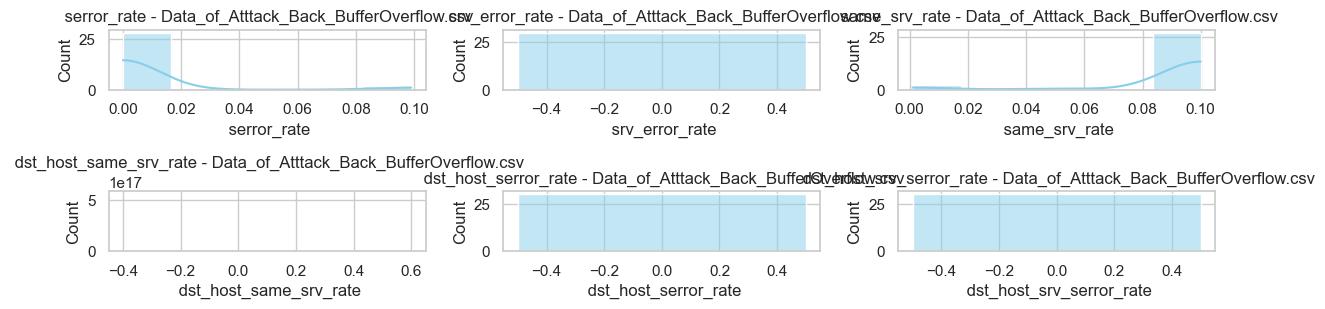

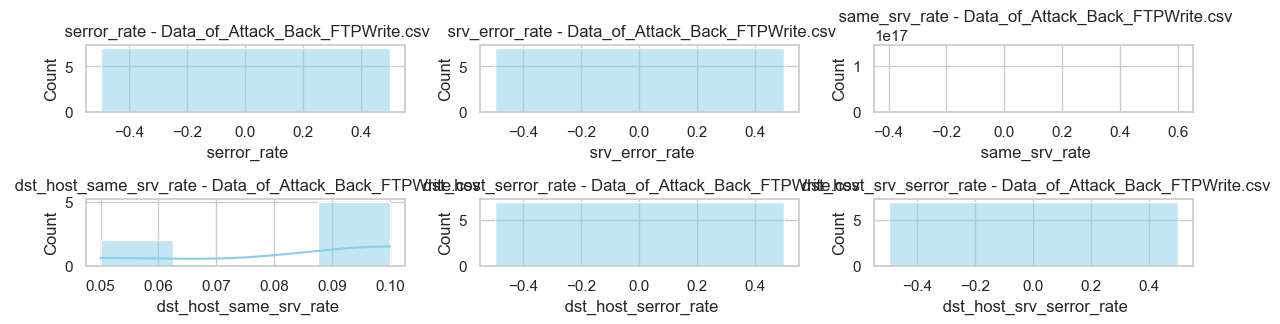

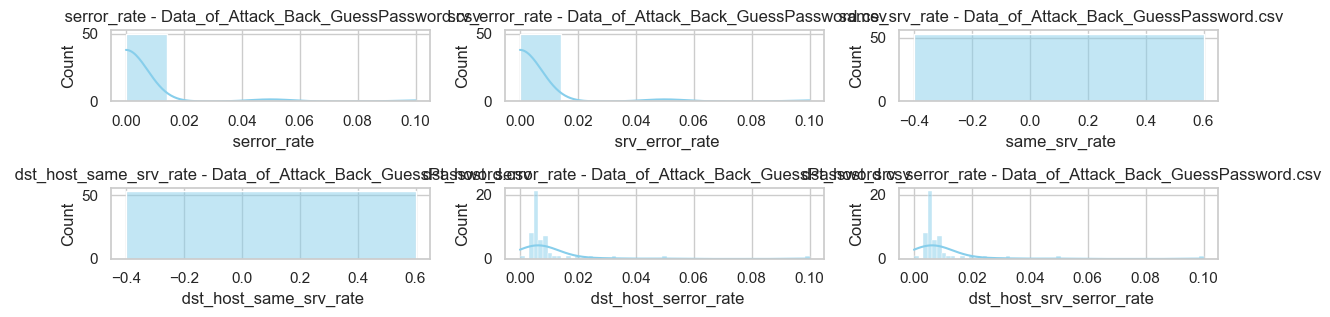

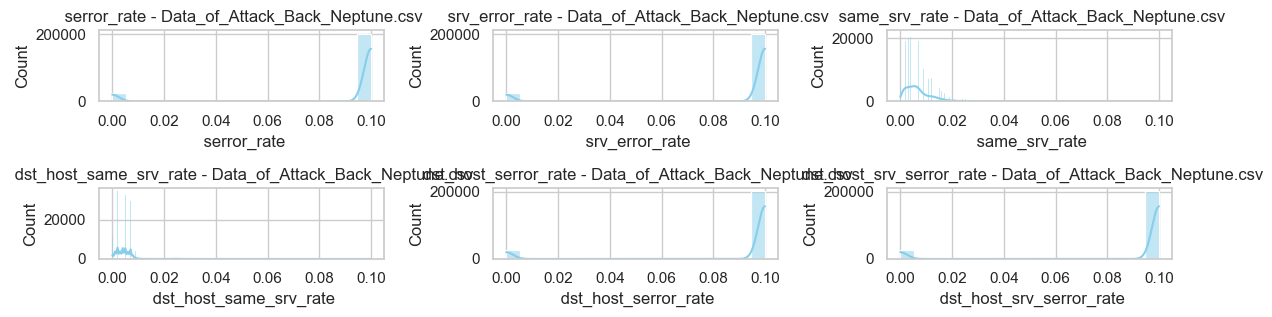

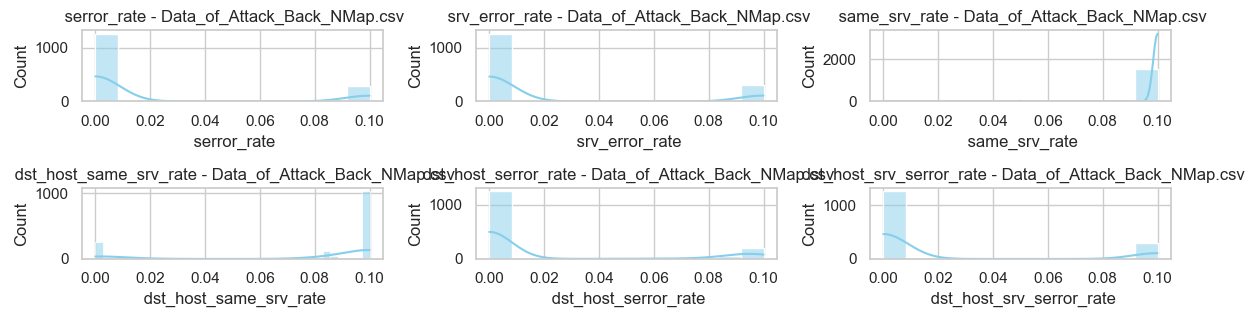

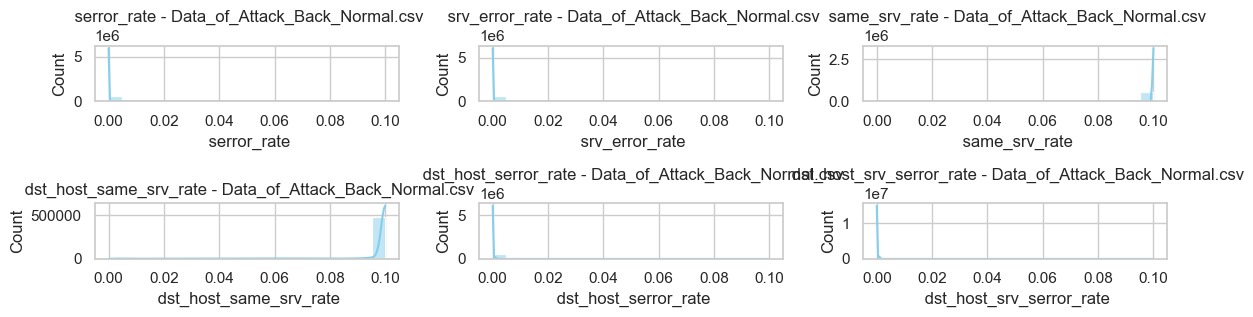

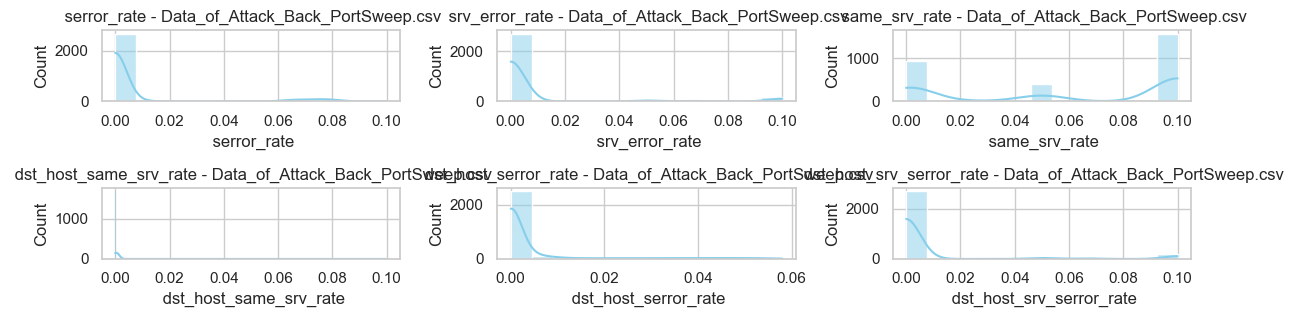

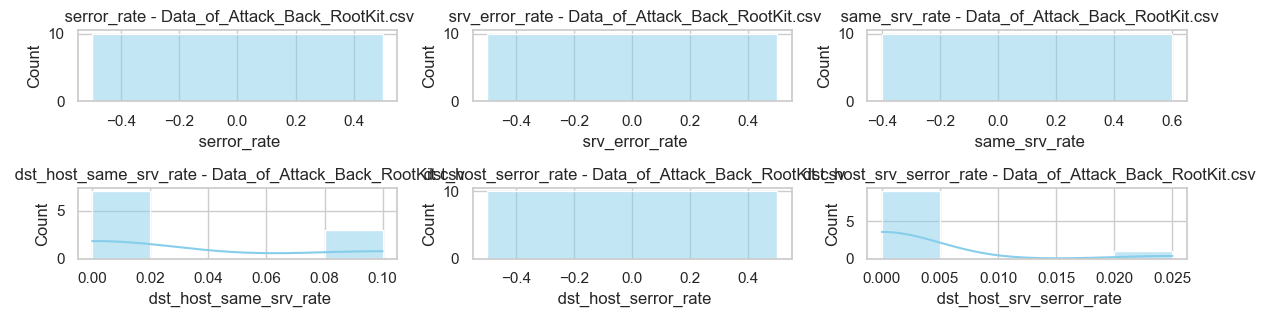

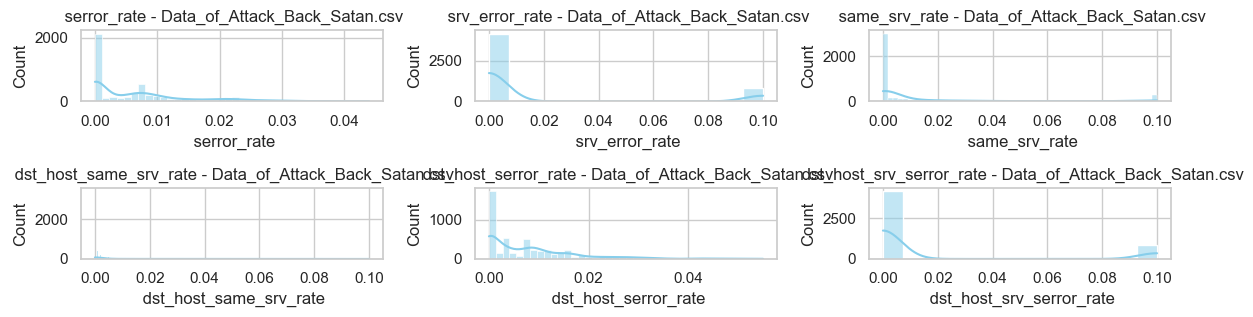

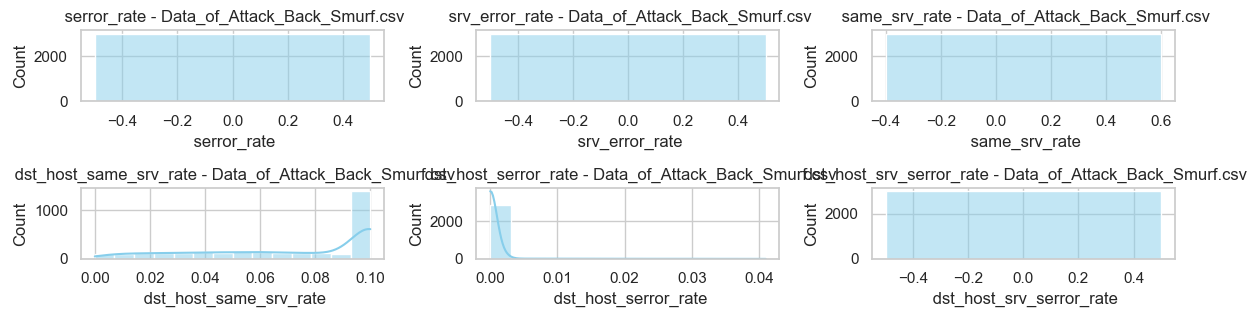

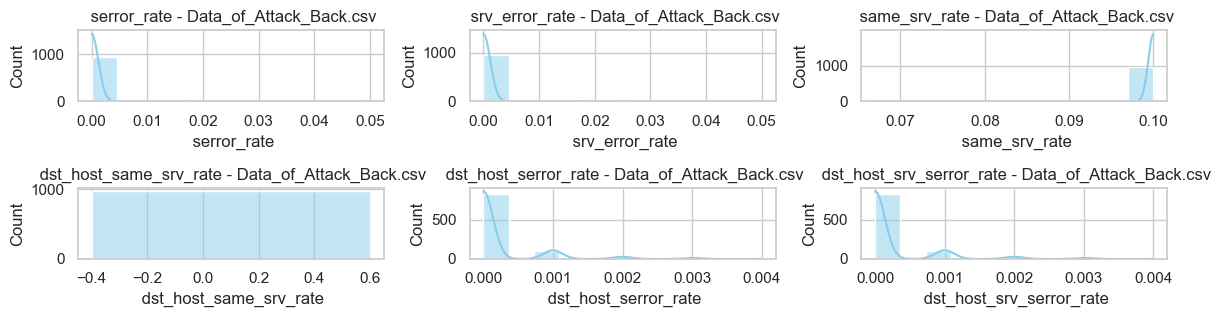

In [28]:


attack_types = all_data['attack'].unique()

# Calculate the number of rows and columns for subplot grid
num_rows = (len(attack_types) - 1) // 3 + 1
num_cols = min(len(attack_types), 3)

# Loop through each attack type and plot the distributions of numerical variables
for attack_type in attack_types:
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')
    
    # Filter data for the current attack type
    df_attack_type = all_data[all_data['attack'] == attack_type]
    
    # Plot the histograms or box plots for numerical variables
    for i, var in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data=df_attack_type, x=var, kde=True, color='skyblue')
        plt.title(var + ' - ' + attack_type)
    
    plt.tight_layout()
    plt.show()


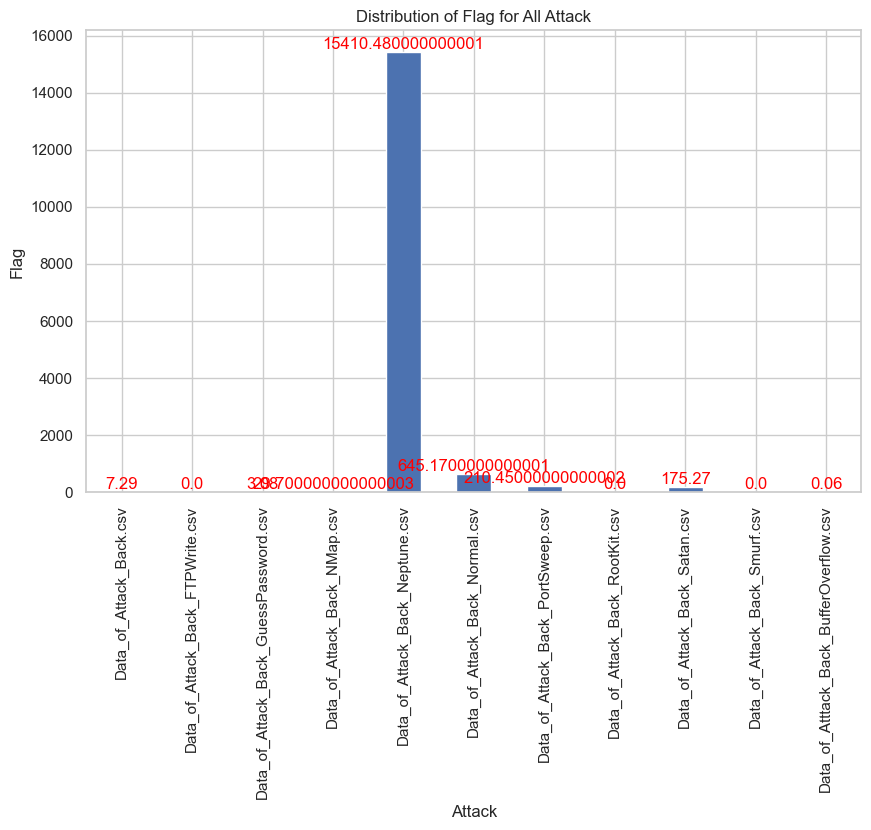

In [35]:
# Group the data by the 'attack' column and calculate the sum of 'flags' for each group
grouped_data = all_data.groupby('attack')[' flag'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Attack')
plt.ylabel('Flag')
plt.title('Distribution of Flag for All Attack')


# Add value labels on each bar
for idx, val in enumerate(grouped_data):
    plt.text(idx, val, str(val), ha='center', va='bottom', color='red')

# Show the bar chart
plt.show()